# Статистика, DS-поток
## Задание SP.5

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  80 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


In [55]:
# Bot check

# HW_ID: ds_sp5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [56]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

-----

## Задача 1.

Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $\textrm{MSE}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta)$$
$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta; $$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta}.$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

***Ответ:** $\textrm{MSE}_{\widehat{\theta}} (\theta) = \theta^2 \cdot (c\frac{n}{n + 1} - 1)^2 + \theta^2 \cdot \frac{c^2 n}{(n+2)(n+1)^2}$ (было на семинаре)*

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

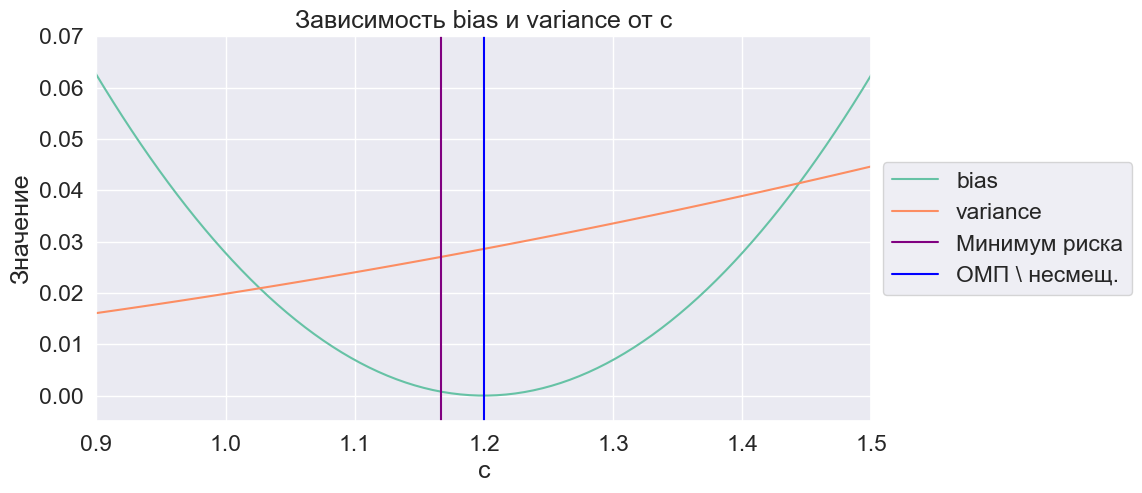

In [57]:
def bias(c, n=5, th=1):
    return th**2 * (c*n/(n+1) - 1)**2
def variance(c, n=5, th=1):
    return th**2 * (c**2 * n / (n+1)**2 / (n+2))

c = np.linspace(0.8, 1.5, 100)

plt.figure(figsize=(10,5))
plt.plot(c, bias(c), label='bias')
plt.plot(c, variance(c), label='variance')
plt.axvline(7/6, label='Минимум риска', color='purple')  # (n+2)/(n+1)
plt.axvline(1.2, label='ОМП \ несмещ.', color='blue')
plt.title('Зависимость bias и variance от с')
plt.xlabel('с')
plt.ylabel('Значение')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0.9, 1.5)
plt.ylim(-0.005, 0.07)
plt.show()

***Вывод:** График bias-a имеет форму параболы и минимум в точке 1.2, а график variance в интересующей нас области монотонно возрастает. Значение c=1.2 (ОМП \ несмещ.) дает минимум bias-а, но с=7/6 (минимум риска) выгоднее с точки зрения всей MSE*

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

***Ответ:** $\text{MSE}_{\hat{\sigma}^2} = (\sigma^2)^2 \cdot \left(\frac{n-1}{c_n}  - 1\right)^2 + (\sigma^2)^2 \cdot \frac{2(n-1)}{c_n^2}  $ (с семинара, сразу для а=0)*

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

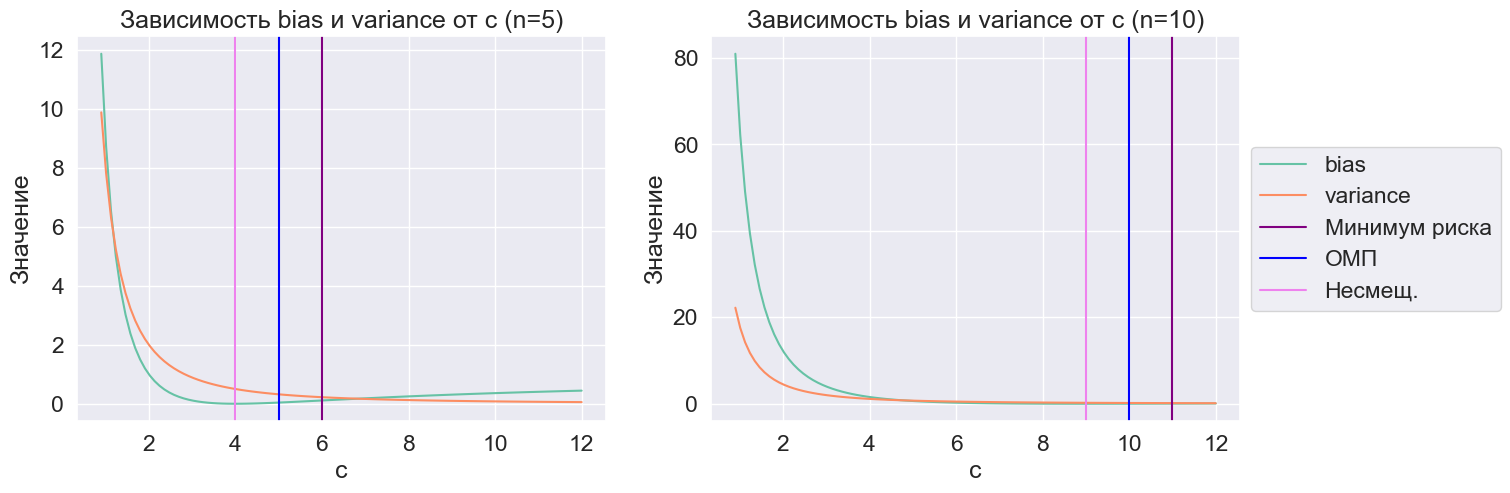

In [58]:
def bias(c, n=5, sigm=1):
    return sigm**4 * ((n-1)/c - 1)**2
def variance(c, n=5, sigm=1):
    return sigm**4 * (2 * (n-1) / c**2)

c = np.linspace(0.9, 12, 100)
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(121)  # n=5
ax.plot(c, bias(c,5), label='bias')
ax.plot(c, variance(c,5), label='variance')
ax.set_title('Зависимость bias и variance от с (n=5)')
ax.set_xlabel('с')
ax.set_ylabel('Значение')
ax.axvline(6, label='Минимум риска', color='purple')
ax.axvline(5, label='ОМП', color='blue')
ax.axvline(4, label='Несмещ.', color='violet')

ax = plt.subplot(122)  # n=10
ax.plot(c, bias(c,10), label='bias')
ax.plot(c, variance(c,10), label='variance')
ax.set_title('Зависимость bias и variance от с (n=10)')
ax.set_xlabel('с')
ax.set_ylabel('Значение')
ax.axvline(11, label='Минимум риска', color='purple')
ax.axvline(10, label='ОМП', color='blue')
ax.axvline(9, label='Несмещ.', color='violet')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

***Вывод:** во всех случаях несмещенная оценка < ОМП < минимум риска. Графики bias и variance по форме напоминают гиперболы и убывают (кроме графика bias для n=5, имеющего минимум около 4)*

Сделайте вывод по результатам пунктов *a)*, *b)*.

***Общий вывод:** в рамках задачи удалось пронаблюдать связь между bias-variance разложением и тремя видами оценок (для U и N распределений)*

---
## Задача 2.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

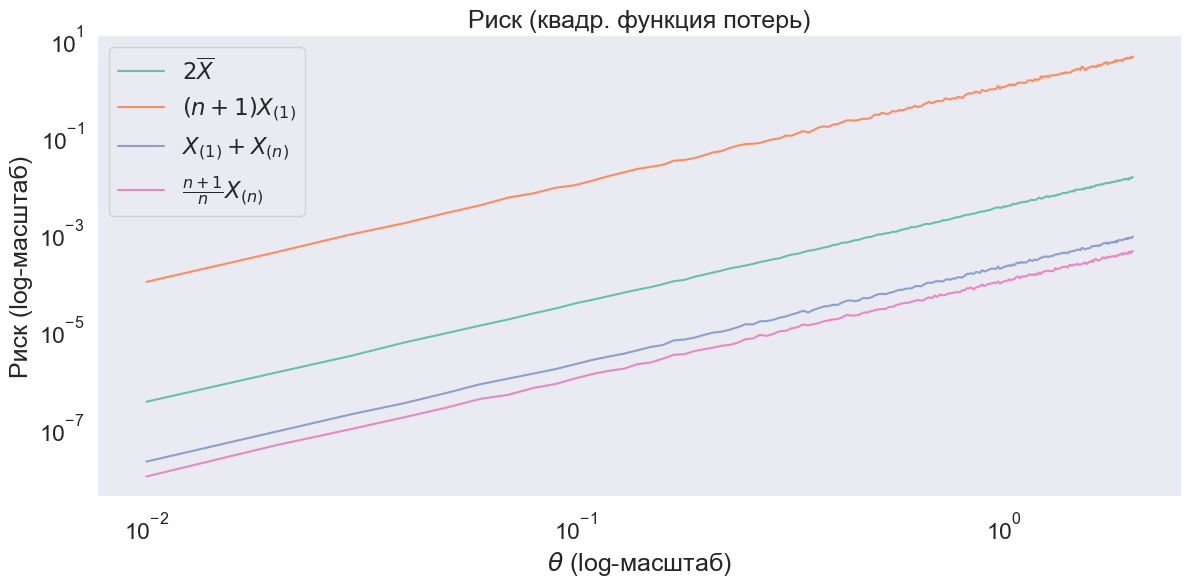

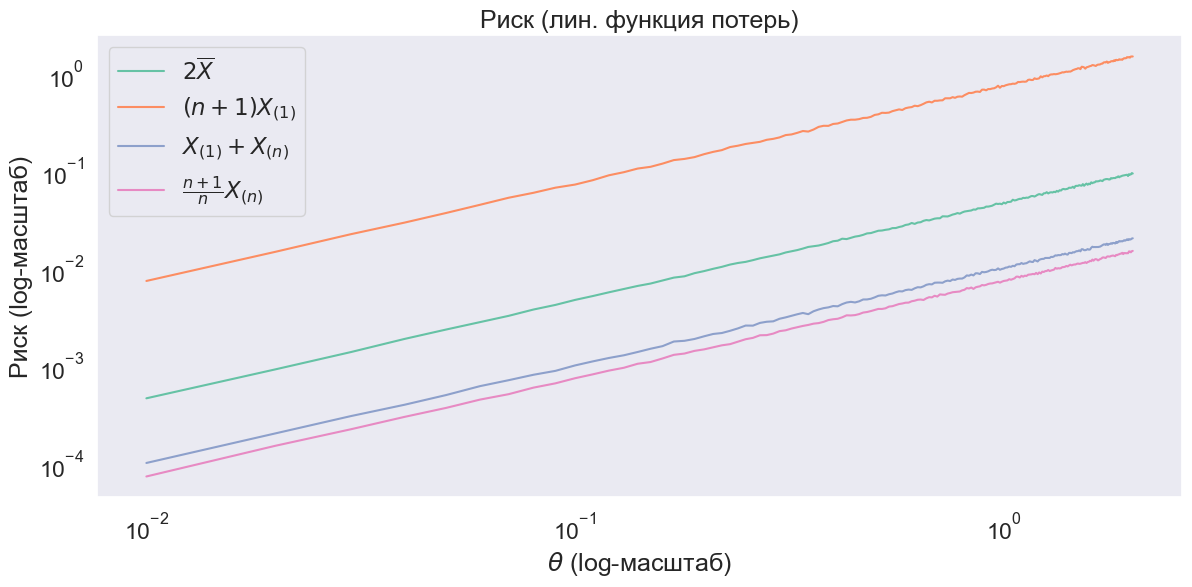

In [69]:
num_samples, n, risks_quadr, risks_lin = 5000, 100, [], []
labels = ['$2\overline{X}$', '$(n+1)X_{(1)}$', '$X_{(1)}+X_{(n)}$', '$\\frac{n+1}{n} X_{(n)}$']

for th in np.arange(0.01, 2.01, 0.01):
    samples = np.random.uniform(0, th, (num_samples, n))
    X_1, X_n = samples.min(axis=1), samples.max(axis=1)
    estimators = [2*np.mean(samples, axis=1),  (n+1)*X_1,  X_1+X_n, (n+1)/n*X_n]  # 4 оценки из условия
    risks_quadr.append([np.mean((pred-th)**2) for pred in estimators])
    risks_lin.append([np.mean(np.abs(pred-th)) for pred in estimators])
risks_quadr, risks_lin = np.array(risks_quadr), np.array(risks_lin)

plt.figure(figsize=(14, 6))
for risk, label in zip(risks_quadr.T, labels):
    plt.plot(np.arange(0.01, 2.01, 0.01), risk, label=label)
plt.title('Риск (квадр. функция потерь)')
plt.xlabel('$\\theta$ (log-масштаб)')
plt.ylabel('Риск (log-масштаб)')
plt.xscale("log") 
plt.yscale("log")  
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
for risk, label in zip(risks_lin.T, labels):
    plt.plot(np.arange(0.01, 2.01, 0.01), risk, label=label)
plt.title('Риск (лин. функция потерь)')
plt.xlabel('$\\theta$ (log-масштаб)')
plt.ylabel('Риск (log-масштаб)')
plt.xscale("log") 
plt.yscale("log")  
plt.legend()
plt.grid()
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

***Вывод:** в обоих (линейном и квадратичном) подходах оценка с наименьшим риском - это $\frac{n+1}{n} X_{(n)}$*  
*В этой задаче удалось на практике сравнить 4 оценки по степени их риска*  

---
##  Задача 3.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.
В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$
Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

*$MSE_{\overline{X}} (\theta) = \mathsf{E} \left(\overline{X} - \theta\right)^2 = \mathsf{E} \left(\overline{X} - \mathsf{E}\overline{X}\right)^2 = \mathsf{D}\overline{X} = \frac{1}{n^2} \cdot n \cdot \mathsf{D}X_1 = \frac{\theta(1-\theta)}{n} = \frac{\theta(1-\theta)}{9}$ (воспользовался несмещенностью оценки, определением дисперсии и формулой дисперсии для бернуллиевской величины)*    
*$MSE_{\widetilde{\theta}} (\theta) = \mathsf{E} \left(\widetilde{\theta} - \theta\right)^2 = \frac{1}{4\cdot(1+\sqrt{n})^2} = \frac{1}{4\cdot(1+\sqrt{9})^2} = \frac{1}{64}$ (воспользовался задачей из дз ST5)*     

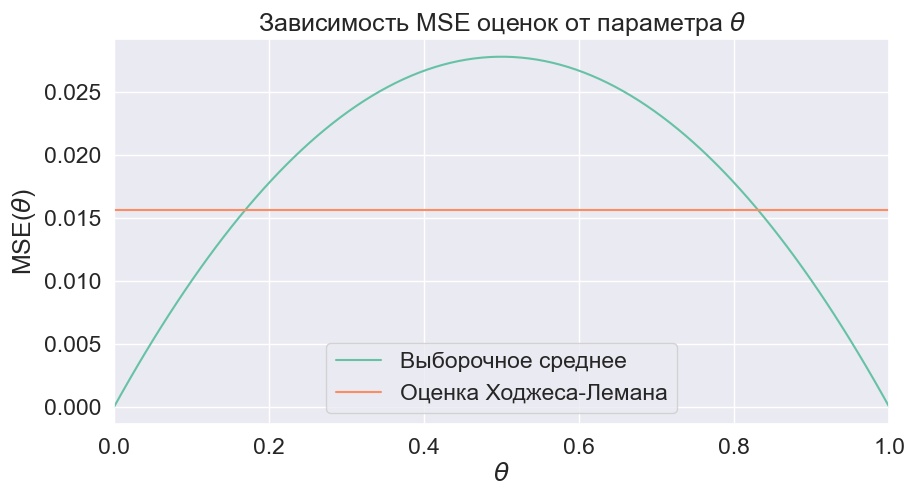

In [60]:
plt.figure(figsize=(10,5))
th = np.linspace(0,1,100)
sns.lineplot(x=th, y=th*(1-th)/9, label='Выборочное среднее')
sns.lineplot(x=th, y=[1/64]*len(th), label='Оценка Ходжеса-Лемана')
plt.title('Зависимость MSE оценок от параметра $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('MSE($\\theta$)')
plt.xlim(0,1)
plt.legend()
plt.show()

*Посчитаем долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. Для этого решим уравнение $\frac{\theta(1-\theta)}{9} = \frac{1}{64}$. Корни: $\theta_{1,2} = \frac{1}{2} \pm \frac{\sqrt{7}}{8}$. Соответственно, $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$ при $\theta$ между корнями. Тогда доля таких $\theta$ равна $\frac{2\sqrt{7}}{8} \approx 0.66$* 

***Ответ:** 66%* 

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [61]:
np.random.seed(42)  # для воспроизводимости
thetas, X_means, X_hodges = np.random.uniform(0,1,1000), [], []

for th in thetas:  # создаем по выборке для каждого theta
    X_k = sps.bernoulli.rvs(th, size=9)  # size = n = 9
    X_means.append(np.mean(X_k))
    X_hodges.append(0.75*np.mean(X_k) + 1/8)  # сразу упростим при n = 9

err_mean, err_hodges = (np.array(X_means) - thetas)**2, (np.array(X_hodges) - thetas)**2  # отклонения от истины
print(f'Оценка Ходжеса-Лемана ближе к истине в {(err_hodges < err_mean).mean()*100:.1f}% случаев')

Оценка Ходжеса-Лемана ближе к истине в 51.7% случаев


***Вывод:** оценка Ходжеса-Лемана оказалась ближе к истине в 51.7% случаев. Ответ отличается от предыдущего (66%). Это может объясняться слишком маленьким размером выборки (n=9), из-за чего высок разброс среднего выборочного. Похоже, в таких условиях лучшая (в минимаксном подходе) оценка Ходжеса-Лемана ведет себя хуже*

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.
Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$. Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода Монте-Карло. Сделайте выводы.

**Решение:**

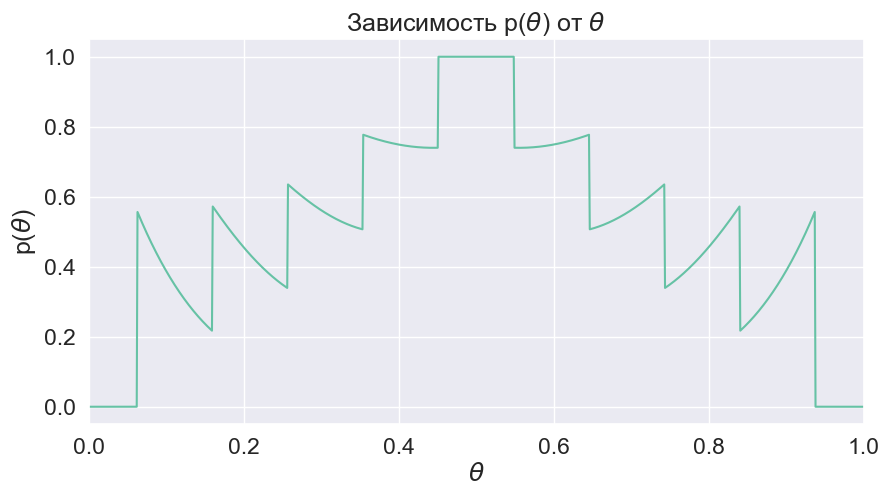

In [62]:
def p(th, n=9):
    if th > 0.5:  # симметрия относительно 0.5
        th = 1 - th
    d_n = 1 / (4 * (1 + np.sqrt(n)))
    return 1 - (sps.binom.cdf(n / 2, n, th) - sps.binom.cdf(n * (th - d_n) / (1 - 2*d_n), n, th))

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, 1, 1000), [p(th) for th in np.linspace(0, 1, 1000)])
plt.title('Зависимость p($\\theta$) от $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('p($\\theta$)')
plt.xlim(0,1)
plt.show()

In [63]:
np.random.seed(42)  # для воспроизводимости
thetas = np.random.uniform(0, 1, 100000)
p_ = np.mean([p(th) for th in thetas])
print(f"p* = {p_*100:.1f}%")

p* = 50.9%


***Ответ:** в этот раз вероятность равна 50.9%, что отличается от значения из 1го пункта (66%). Возможно, расхождение снова объсняется слишком маленькой выборкой (n=9)*

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

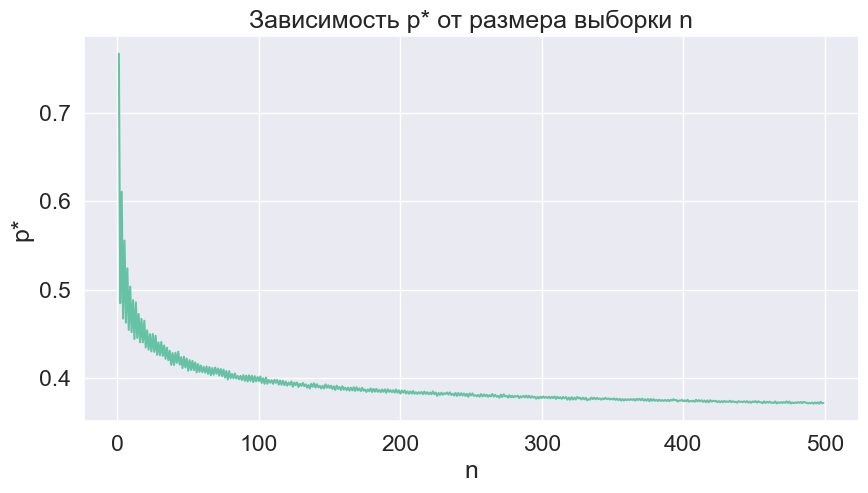

In [66]:
thetas = np.random.uniform(0, 1, 1000)
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,500), [np.mean([p(th,n) for th in thetas]) for n in np.arange(1,500)])
plt.title('Зависимость p* от размера выборки n')
plt.xlabel('n')
plt.ylabel('p*')
plt.show()

***Ответ:** видно, что для малых размеров выборок исследуемая вероятность завышается, а с ростом n стабилизируется. Это аргумент в пользу того, что искажения оценок вероятностей вызваны слишком маленькой выборкой*

***Вывод:** в этой задаче удалось ближе познакомиться с оценкой Ходжеса-Лемана и пронаблюдать ряд ее свойств*